In [1]:
from sklearn.datasets import load_svmlight_file
from sklearn.cross_validation import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/home/w2w/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# 读取数据
data_aus = load_svmlight_file(f='australian_scale')
# 分割数据
X_train, X_test, y_train, y_test = train_test_split(data_aus[0], data_aus[1], test_size=0.4, random_state=0)

In [3]:
class SVM(object):
    '''
    Parameters:
    ----------
        turns_ : max iteration numbers
        learning_rate_ : learning rate
        c_ : tradeoff
        silence_ : print process or not
        plot_ : plot or not

    Attribute:
    ----------
        w_ : array, shape (n_features, ), [w1, w2, ..., wn]
        b_ : w0, bias

    Data format:
    ----------
        y : m*1
        x : m*n
        w : n*1
        b : 1*1
    '''

    def __init__(self, turns=50, learning_rate=0.01, c=0.1, silence=False, plot=True):
        self.turns_ = turns
        self.learning_rate_ = learning_rate
        self.c_ = c
        self.silence_ = silence
        self.plot_ = plot = plot

    def calc_error(self, X, y, w, b):
        '''
            error = 0.5||w||^2 + C* sum (max(0, 1-yi(wTxi + b)))
        '''
        hinge = 1 - (X.dot(w) + b)*y
        hinge = np.array([max(0, x) for x in hinge])
        error = 0.5 * np.sum(w ** 2) + self.c_ * np.sum(hinge)
        return error

    def gradient(self, X, y, w, b):
        '''
            y_ = Xw + b
            Hinge loss = max(0, 1-yi(wTxi + b))
            g_w = (2/N)*XT*(y_-y)
            g_b = (2/N)*(y_-y)
        '''
        N = X.shape[0]
        hinge = 1 - (X.dot(self.w_) + self.b_)*y
        hinge_derivative_w = np.zeros([self.w_.shape[0]])
        hinge_derivative_b = 0.0
        for i in range(N):
            hin = hinge[i]
            if hin > 0:
                derivative = -self.c_ * y[i] * X[i]
                # 将sparse matrix转化为array
                hinge_derivative_w += derivative.toarray()[0]
                hinge_derivative_b -= y[i]
        g_w = w + np.array(hinge_derivative_w)
        g_b = hinge_derivative_b
        w1 = w - self.learning_rate_ * g_w
        b1 = b - self.learning_rate_ * g_b
        return w1, b1

    def fit(self, X_train, y_train, X_test, y_test):
        '''
            Gradient descent
        '''
        n_features = X_train.shape[1]
        n_targets = 1
        self.w_ = np.zeros([n_features])
        self.b_ = 0
        train_loss_list = []
        test_loss_list = []
        for i in range(self.turns_):
            if self.silence_ == False:
                print('Turn %d' % i)
                print('w:', self.w_)
                print('b:', self.b_)
                print('Train Loss:', self.calc_error(X_train, y_train, self.w_, self.b_))
                print('Test Loss:', self.calc_error(X_test, y_test, self.w_, self.b_))
                print('---------------------------')
                train_loss_list.append(self.calc_error(X_train, y_train, self.w_, self.b_))
                test_loss_list.append(self.calc_error(X_test, y_test, self.w_, self.b_))
            self.w_, self.b_ = self.gradient(X_train, y_train, self.w_, self.b_)
        print('Iteration End')
        print('w:', self.w_)
        print('b:', self.b_)
        print('Train Loss:', self.calc_error(X_train, y_train, self.w_, self.b_))
        print('Test Loss:', self.calc_error(X_test, y_test, self.w_, self.b_))
        print('---------------------------')
        if self.silence_ == False:
            fig1, = plt.plot(range(self.turns_), train_loss_list)
            fig2, = plt.plot(range(self.turns_), test_loss_list)
            plt.xlabel('Iteration')
            plt.ylabel('Loss')
            plt.legend(handles=[fig1,fig2], labels=['train_loss','validate_loss'], loc='best')
            plt.title('SVM')
            plt.show()

Turn 0
w: [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
b: 0
Train Loss: 41.4
Test Loss: 27.6
---------------------------
Turn 1
w: [-0.0002      0.00347287  0.00520079  0.0045      0.00907692  0.005575
  0.00589375  0.0294      0.02        0.0057194   0.0032      0.0023
  0.0020851   0.0040881 ]
b: -0.034
Train Loss: 39.7439023756
Test Loss: 26.4251792754
---------------------------
Turn 2
w: [-0.0003998   0.00694227  0.01039637  0.0089955   0.01814477  0.01114442
  0.01178161  0.0587706   0.03998     0.01143308  0.0063968   0.0045977
  0.00416811  0.0081721 ]
b: -0.068
Train Loss: 38.090884206
Test Loss: 25.2529295286
---------------------------
Turn 3
w: [-0.0005994   0.0104082   0.01558676  0.0134865   0.02720355  0.01670828
  0.01766359  0.08811183  0.05994002  0.01714105  0.0095904   0.0068931
  0.00624905  0.01225203]
b: -0.102
Train Loss: 36.4409393353
Test Loss: 24.0832451123
---------------------------
Turn 4
w: [-0.0007988   0.01387066  0.02077196  0.01797302  0.

w: [ 0.0160692   0.03305834  0.05103975  0.06740933  0.15773665  0.09265938
  0.05467468  0.69920761  0.3485372   0.04811917  0.01284778  0.04344334
 -0.02965781  0.0127887 ]
b: 0.09
Train Loss: 14.9626204595
Test Loss: 10.534237727
---------------------------
Turn 39
w: [ 0.01615313  0.03308056  0.05139135  0.06764192  0.15852507  0.09321672
  0.0549639   0.7054084   0.34568866  0.04839792  0.01233493  0.0439999
 -0.02996005  0.01323431]
b: 0.089
Train Loss: 14.9143001175
Test Loss: 10.5014355872
---------------------------
Turn 40
w: [ 0.01613698  0.03311178  0.05179857  0.06787428  0.1594127   0.0937735
  0.05532416  0.71130299  0.34254297  0.04874057  0.0119226   0.0445559
 -0.03015519  0.01377739]
b: 0.087
Train Loss: 14.8669037448
Test Loss: 10.4692291857
---------------------------
Turn 41
w: [ 0.01612084  0.03314296  0.05220537  0.06810641  0.16029944  0.09432973
  0.05568407  0.71719169  0.33940043  0.04908287  0.01151068  0.04511134
 -0.03035014  0.01431993]
b: 0.085
Train Lo

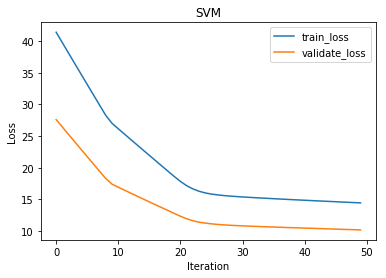

In [4]:
clf = SVM(turns = 50, learning_rate = 0.001, c = 0.1)
clf.fit(X_train, y_train, X_test, y_test)